In [30]:
"""# 1. What is a Decision Tree, and how does it work?

A Decision Tree is a supervised learning algorithm that splits data into branches based on feature values to make predictions by following decision rules from root to leaf.

# 2. What are impurity measures in Decision Trees?

Impurity measures quantify how mixed the classes are in a node and help decide the best feature to split the data.

# 3. What is the mathematical formula for Gini Impurity?

Gini = 1 − Σ (pᵢ)², where pᵢ is the probability of class i in the node.

# 4. What is the mathematical formula for Entropy?

Entropy = − Σ pᵢ log₂(pᵢ), where pᵢ is the probability of class i.

# 5. What is Information Gain, and how is it used in Decision Trees?

Information Gain = Entropy(parent) − Weighted Entropy(children); it measures the reduction in impurity after a split.

# 6. What is the difference between Gini Impurity and Entropy?

Gini is computationally faster and measures class impurity, while Entropy measures information disorder using logarithms.

# 7. What is the mathematical explanation behind Decision Trees?

Decision Trees recursively partition the feature space to minimize impurity or variance using greedy optimization at each split.

# 8. What is Pre-Pruning in Decision Trees?

Pre-Pruning stops tree growth early by setting conditions like maximum depth or minimum samples per split.

# 9. What is Post-Pruning in Decision Trees?

Post-Pruning removes branches after the full tree is built to reduce overfitting.

# 10. What is the difference between Pre-Pruning and Post-Pruning?

Pre-Pruning prevents overgrowth during training, while Post-Pruning trims the tree after complete construction.

# 11. What is a Decision Tree Regressor?

A Decision Tree Regressor predicts continuous values by splitting data to minimize variance (e.g., using Mean Squared Error).

# 12. What are the advantages and disadvantages of Decision Trees?

Advantages include interpretability and no need for scaling; disadvantages include overfitting and instability with small data changes.

# 13. How does a Decision Tree handle missing values?

It may use surrogate splits, assign missing values to the most common branch, or treat missing as a separate category.

# 14. How does a Decision Tree handle categorical features?

It can split data based on category values directly or use encoding methods.

# 15. What are some real-world applications of Decision Trees?

Applications include credit risk analysis, medical diagnosis, customer segmentation, fraud detection, and recommendation systems."""


'# 1. What is a Decision Tree, and how does it work?\n\nA Decision Tree is a supervised learning algorithm that splits data into branches based on feature values to make predictions by following decision rules from root to leaf.\n\n# 2. What are impurity measures in Decision Trees?\n\nImpurity measures quantify how mixed the classes are in a node and help decide the best feature to split the data.\n\n# 3. What is the mathematical formula for Gini Impurity?\n\nGini = 1 − Σ (pᵢ)², where pᵢ is the probability of class i in the node.\n\n# 4. What is the mathematical formula for Entropy?\n\nEntropy = − Σ pᵢ log₂(pᵢ), where pᵢ is the probability of class i.\n\n# 5. What is Information Gain, and how is it used in Decision Trees?\n\nInformation Gain = Entropy(parent) − Weighted Entropy(children); it measures the reduction in impurity after a split.\n\n# 6. What is the difference between Gini Impurity and Entropy?\n\nGini is computationally faster and measures class impurity, while Entropy meas

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [32]:
# 1) Train a Decision Tree Classifier on Iris dataset and print accuracy

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


In [33]:
# 2) Decision Tree Classifier with Gini criterion and print feature importances

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(criterion="gini", random_state=42)
clf.fit(X_train, y_train)

print("Feature importances:", clf.feature_importances_)


Feature importances: [0.00625    0.02916667 0.5585683  0.40601504]


In [34]:
# 3) Decision Tree Classifier with Entropy criterion and print accuracy

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(criterion="entropy", random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9333333333333333


In [35]:
# 4) Decision Tree Regressor on housing dataset and evaluate using MSE
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = DecisionTreeRegressor(random_state=42)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.495235205629094


In [36]:
# 5) Train Decision Tree Classifier and visualize using graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

dot_data = export_graphviz(
    clf, out_file=None,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True, rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("decision_tree_iris", format="png", cleanup=True)
print("Tree saved as decision_tree_iris.png")


Tree saved as decision_tree_iris.png


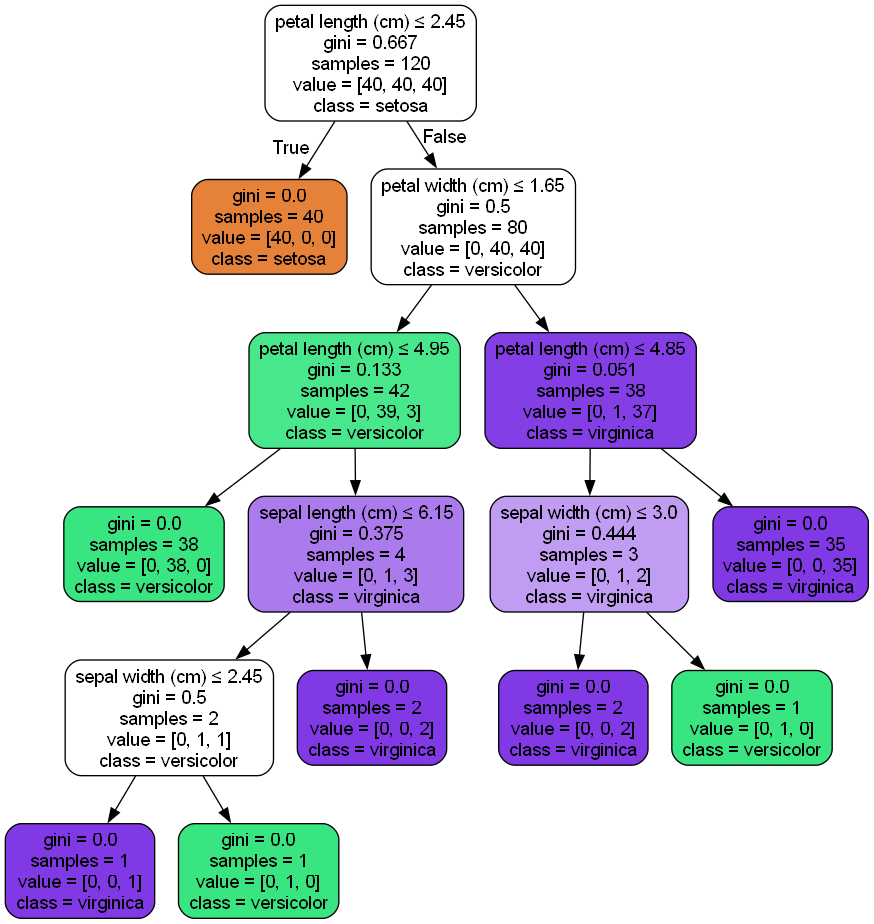

In [37]:
from IPython.display import Image
Image("decision_tree_iris.png")


In [38]:
# 6) Write a Python program to train a Decision Tree Classifier with a maximum depth of 3 and compare its accuracy with a fully grown tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_full = DecisionTreeClassifier(random_state=42)

dt_depth3.fit(X_train, y_train)
dt_full.fit(X_train, y_train)

pred_depth3 = dt_depth3.predict(X_test)
pred_full = dt_full.predict(X_test)

print("max_depth=3 Accuracy:", accuracy_score(y_test, pred_depth3))
print("Fully grown Accuracy:", accuracy_score(y_test, pred_full))


max_depth=3 Accuracy: 0.9666666666666667
Fully grown Accuracy: 0.9333333333333333


In [39]:
# 7) Write a Python program to train a Decision Tree Classifier using min_samples_split=5 and compare its accuracy with a default tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt_mss5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
dt_default = DecisionTreeClassifier(random_state=42)

dt_mss5.fit(X_train, y_train)
dt_default.fit(X_train, y_train)

pred_mss5 = dt_mss5.predict(X_test)
pred_default = dt_default.predict(X_test)

print("min_samples_split=5 Accuracy:", accuracy_score(y_test, pred_mss5))
print("Default Accuracy:", accuracy_score(y_test, pred_default))


min_samples_split=5 Accuracy: 0.9666666666666667
Default Accuracy: 0.9333333333333333


In [40]:
# 8) Write a Python program to apply feature scaling before training a Decision Tree Classifier and compare its accuracy with unscaled data
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaled_tree = Pipeline([
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier(random_state=42))
])
unscaled_tree = DecisionTreeClassifier(random_state=42)

scaled_tree.fit(X_train, y_train)
unscaled_tree.fit(X_train, y_train)

pred_scaled = scaled_tree.predict(X_test)
pred_unscaled = unscaled_tree.predict(X_test)

print("Scaled Data Accuracy:", accuracy_score(y_test, pred_scaled))
print("Unscaled Data Accuracy:", accuracy_score(y_test, pred_unscaled))


Scaled Data Accuracy: 0.9333333333333333
Unscaled Data Accuracy: 0.9333333333333333


In [41]:
# 9) Write a Python program to train a Decision Tree Classifier using One-vs-Rest (OvR) strategy for multiclass classification
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ovr = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))
ovr.fit(X_train, y_train)
pred = ovr.predict(X_test)

print("OvR Accuracy:", accuracy_score(y_test, pred))


OvR Accuracy: 0.9333333333333333


In [42]:
# 10) Write a Python program to train a Decision Tree Classifier and display the feature importance scores
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

imp = pd.DataFrame({
    "Feature": iris.feature_names,
    "Importance": dt.feature_importances_
}).sort_values("Importance", ascending=False)

print(imp)


             Feature  Importance
2  petal length (cm)    0.558568
3   petal width (cm)    0.406015
1   sepal width (cm)    0.029167
0  sepal length (cm)    0.006250


In [43]:
# 11) Write a Python program to train a Decision Tree Regressor with max_depth=5 and compare its performance with an unrestricted tree.
data = fetch_california_housing()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtr_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr_full = DecisionTreeRegressor(random_state=42)

dtr_depth5.fit(X_train, y_train)
dtr_full.fit(X_train, y_train)

pred_depth5 = dtr_depth5.predict(X_test)
pred_full = dtr_full.predict(X_test)

print("max_depth=5 MSE:", mean_squared_error(y_test, pred_depth5))
print("Unrestricted MSE:", mean_squared_error(y_test, pred_full))


max_depth=5 MSE: 0.5245146178314735
Unrestricted MSE: 0.495235205629094


Best ccp_alpha: 0.00625
Best Pruned Accuracy: 0.9666666666666667


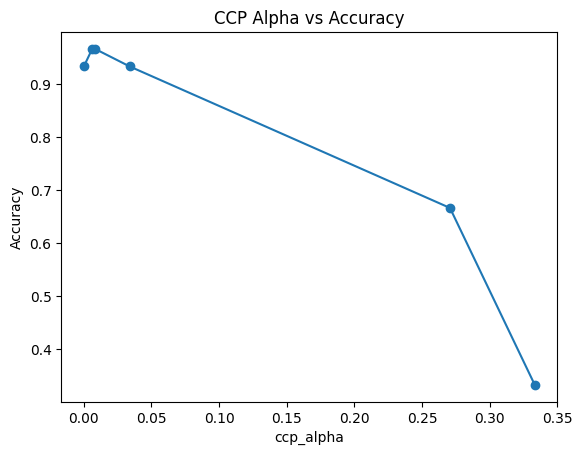

In [44]:
# 12) Write a Python program to train a Decision Tree Classifier, apply Cost Complexity Pruning (CCP), and visualize its effect on accuracy.
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = np.unique(path.ccp_alphas)

accs = []
for a in ccp_alphas:
    m = DecisionTreeClassifier(random_state=42, ccp_alpha=a)
    m.fit(X_train, y_train)
    accs.append(accuracy_score(y_test, m.predict(X_test)))

best_i = int(np.argmax(accs))
print("Best ccp_alpha:", ccp_alphas[best_i])
print("Best Pruned Accuracy:", accs[best_i])

plt.plot(ccp_alphas, accs, marker="o")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("CCP Alpha vs Accuracy")
plt.show()


In [ ]:
# 13) Write a Python program to train a Decision Tree Classifier and evaluate its performance using Precision, Recall, and F1-Score
from sklearn.metrics import precision_score, recall_score, f1_score
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

print("Precision (macro):", precision_score(y_test, pred, average="macro"))
print("Recall (macro):   ", recall_score(y_test, pred, average="macro"))
print("F1-Score (macro): ", f1_score(y_test, pred, average="macro"))


Precision (macro): 0.9333333333333332
Recall (macro):    0.9333333333333332
F1-Score (macro):  0.9333333333333332


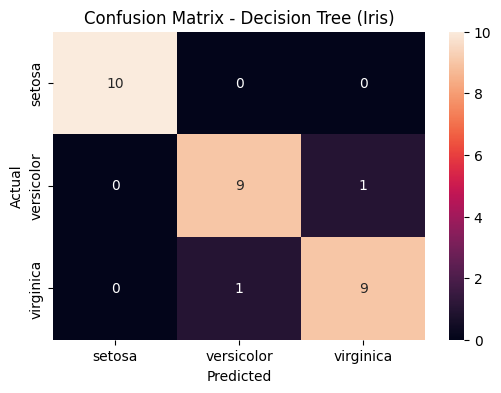

In [49]:
# 14) Write a Python program to train a Decision Tree Classifier and visualize the confusion matrix using seaborn
from sklearn.metrics import confusion_matrix
import seaborn as sns
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
pred = dt.predict(X_test)

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree (Iris)")
plt.show()


In [51]:
# 15) Write a Python program to train a Decision Tree Classifier and use GridSearchCV to find the optimal values for max_depth and min_samples_split
from sklearn.model_selection import train_test_split, GridSearchCV
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

param_grid = {
    "max_depth": [None, 2, 3, 4, 5, 6, 8, 10],
    "min_samples_split": [2, 3, 5, 8, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
pred = best_model.predict(X_test)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
print("Test Accuracy:", accuracy_score(y_test, pred))


Best Params: {'max_depth': None, 'min_samples_split': 2}
Best CV Accuracy: 0.9416666666666668
Test Accuracy: 0.9333333333333333
